In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-10-23 19:52:29.312084: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 19:52:29.388129: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 19:52:29.412551: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-23 19:52:29.566709: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-23 19:52:30.690242: W tensorflow/compiler/tf2

In [7]:
# Import custom functions to extract our Image arrays and Pixel Mask arrays from our created fits files dataset
from dataGathering import extractImageArray, extractPixelMaskArray, extract_star_catalog
from dataGathering import getStarData, getImagePlot, getPixelMaskPlot
from dataGathering import displayRawImage, displayRawPixelMask, displayImagePlot, displayPixelMaskPlot, displayPixelMaskOverlayPlot

# Import astropy to read fits files, and os to interact with the file system
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
import os

In [3]:
# Create images and masks arrays lists
images = []
masks = []

# Create df to store the star data inside each fits file
star_data = []

# Createa a list of all the wcs data in the dataset folder
wcs_data = []

# Create a list of all the fits files in the dataset folder
fits_files = os.listdir('data/')

# For all the fits files in the dataset folder specified in file_path, extract the image and mask arrays to the respective lists
file_path = 'data/'
for file in os.listdir(file_path):
    if file.endswith('.fits'):
        images.append(extractImageArray(file_path + file))
        masks.append(extractPixelMaskArray(file_path + file))
        star_data.append(extract_star_catalog(file_path + file))
        wcs_data.append(WCS(fits.open(file_path + file)[0].header))

        print(file + ' added to dataset')

data69.fits added to dataset
data126.fits added to dataset
data129.fits added to dataset
data7.fits added to dataset
data23.fits added to dataset
data32.fits added to dataset
data105.fits added to dataset
data113.fits added to dataset
data20.fits added to dataset
data104.fits added to dataset
data34.fits added to dataset
data122.fits added to dataset
data64.fits added to dataset
data108.fits added to dataset
data138.fits added to dataset
data124.fits added to dataset
data30.fits added to dataset
data131.fits added to dataset
data16.fits added to dataset
data60.fits added to dataset
data103.fits added to dataset
data102.fits added to dataset
data70.fits added to dataset
data15.fits added to dataset
data116.fits added to dataset
data4.fits added to dataset
data142.fits added to dataset
data78.fits added to dataset
data71.fits added to dataset
data68.fits added to dataset
data5.fits added to dataset
data123.fits added to dataset
data19.fits added to dataset
data107.fits added to dataset
d

In [4]:
fits_files[0]

'data69.fits'

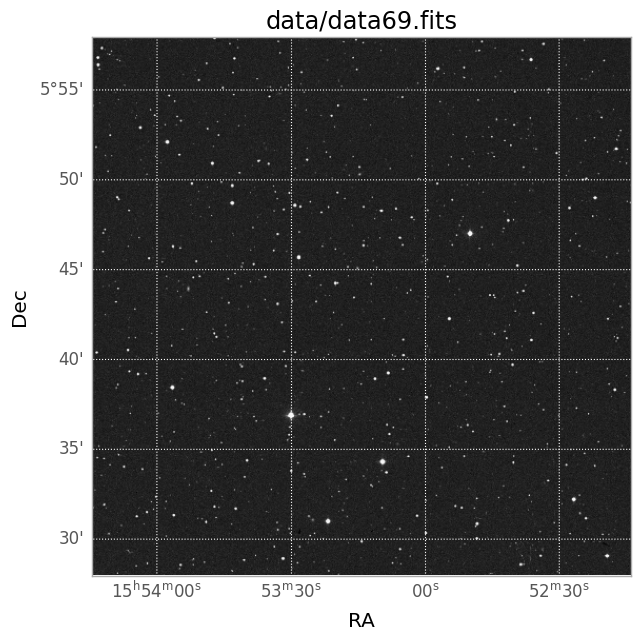

In [5]:
displayImagePlot(file_path + fits_files[3])

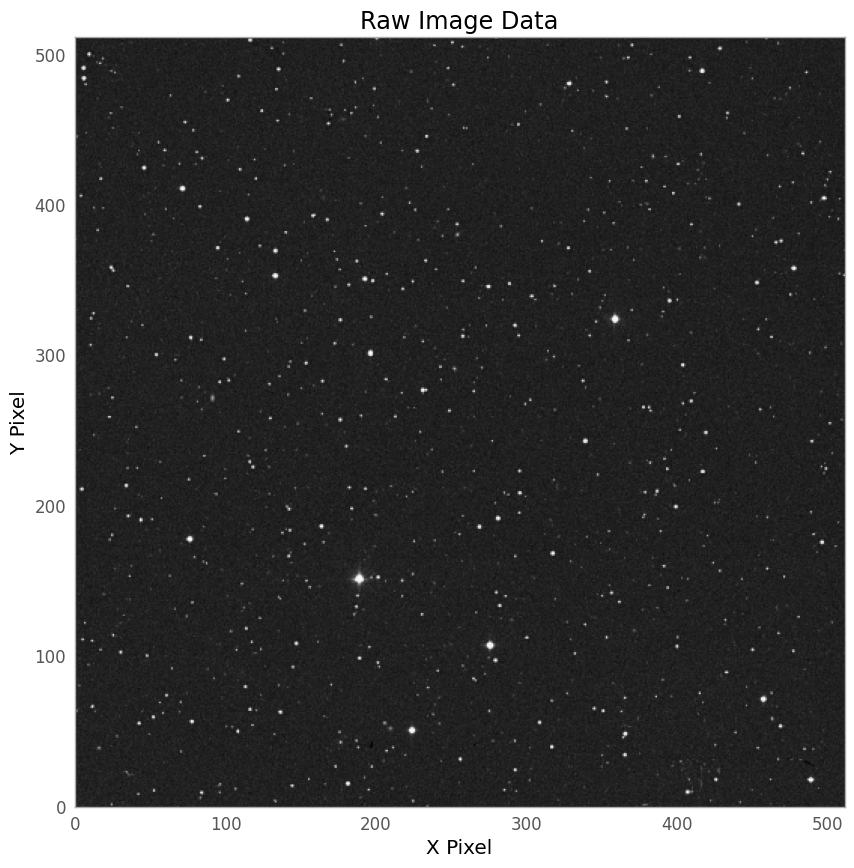

In [8]:
# Display the first image in the dataset using the array
displayRawImage(file_path + fits_files[3])

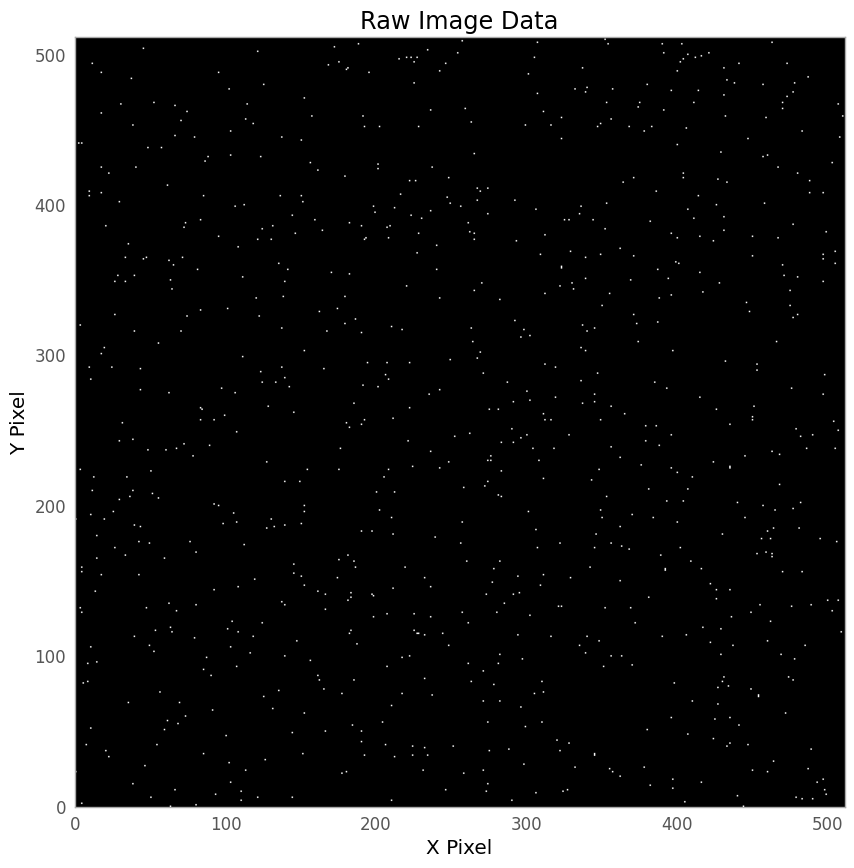

In [9]:
displayRawPixelMask(file_path + fits_files[3])

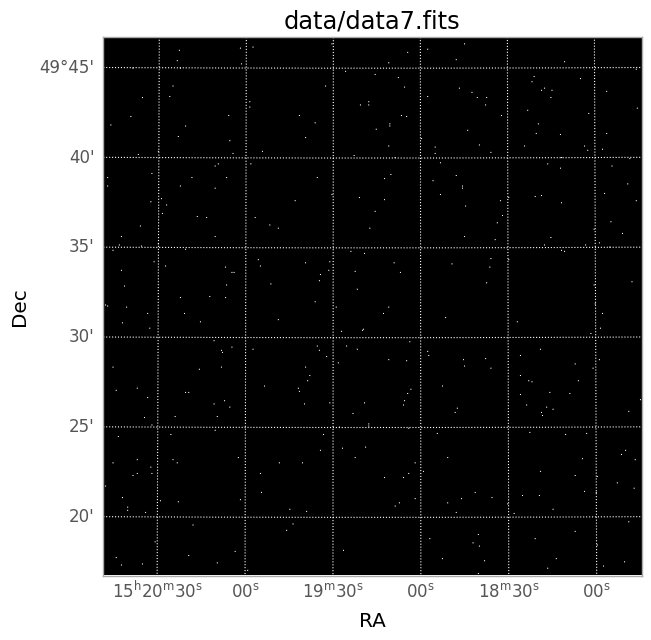

In [43]:
displayPixelMaskPlot(file_path + fits_files[3])

Number of stars in catalog query:  604
Number of cataloged stars in image:  373
Drawing


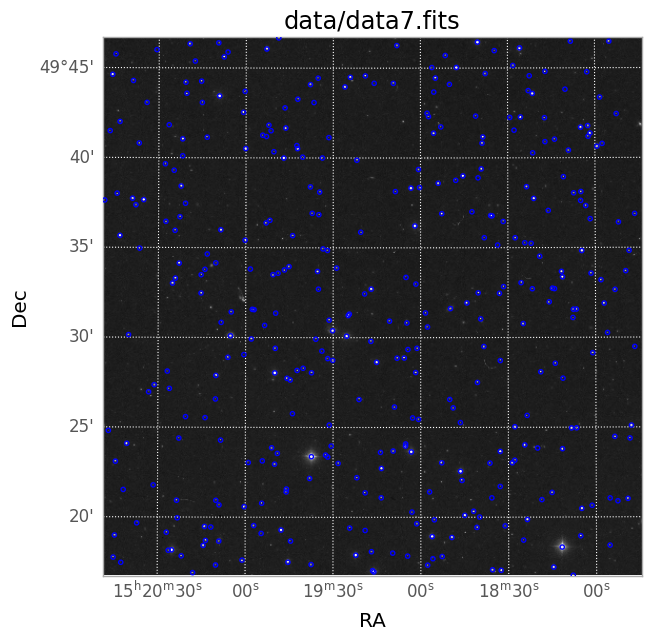

In [44]:
displayPixelMaskOverlayPlot(file_path + fits_files[3])

In [12]:
# Convert lists to numpy arrays
test_images = np.array(images)
test_masks = np.array(masks)

In [13]:
# Ensure the input data has the correct shape
if test_images.ndim == 3:  # If images are grayscale and have shape (num_samples, height, width)
    test_images = np.expand_dims(test_images, axis=-1)  # Add channel dimension
if test_masks.ndim == 3:  # If masks are grayscale and have shape (num_samples, height, width)
    test_masks = np.expand_dims(test_masks, axis=-1)  # Add channel dimension

# Duplicate the single channel across three channels
test_images = np.repeat(test_images, 3, axis=-1)

# Use ImageDataGenerator to load data in batches
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow(test_images, test_masks, batch_size=4)

In [103]:
# Load the saved model
# model = load_model('100unet_model.keras')
model = load_model('150unet_model_1.keras')

In [104]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9932 - loss: 0.1102
Test Loss: 0.11744243651628494
Test Accuracy: 0.9923290014266968


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1574.0..15592.0].


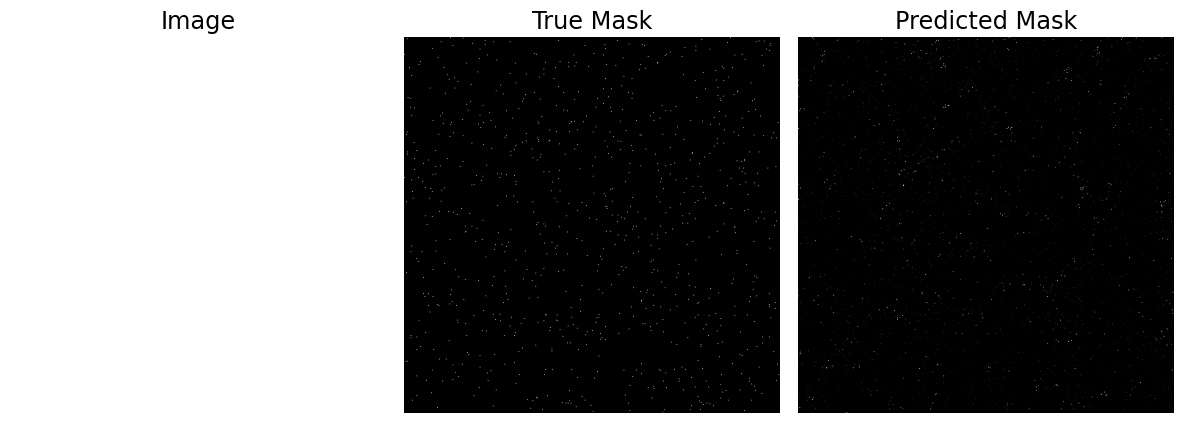

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1970.0..15852.0].


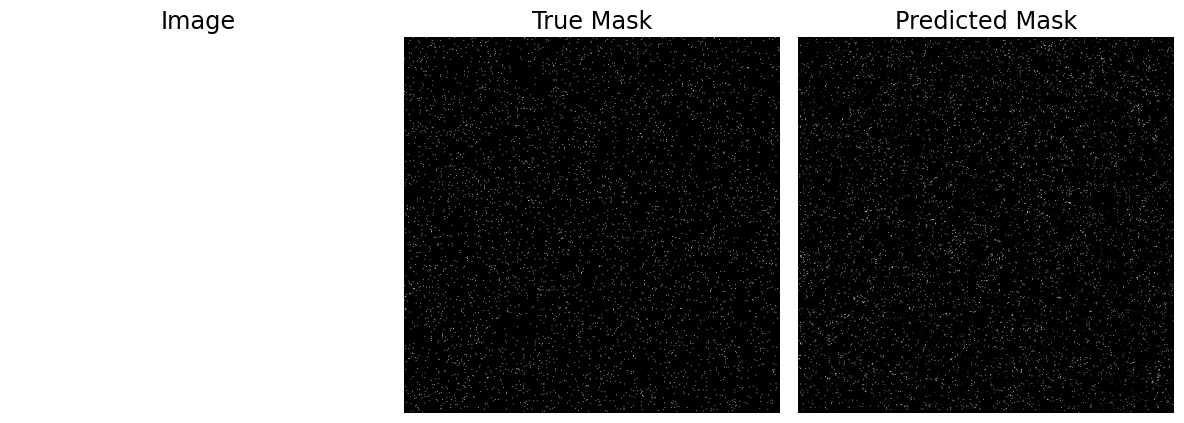

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1603.0..19212.0].


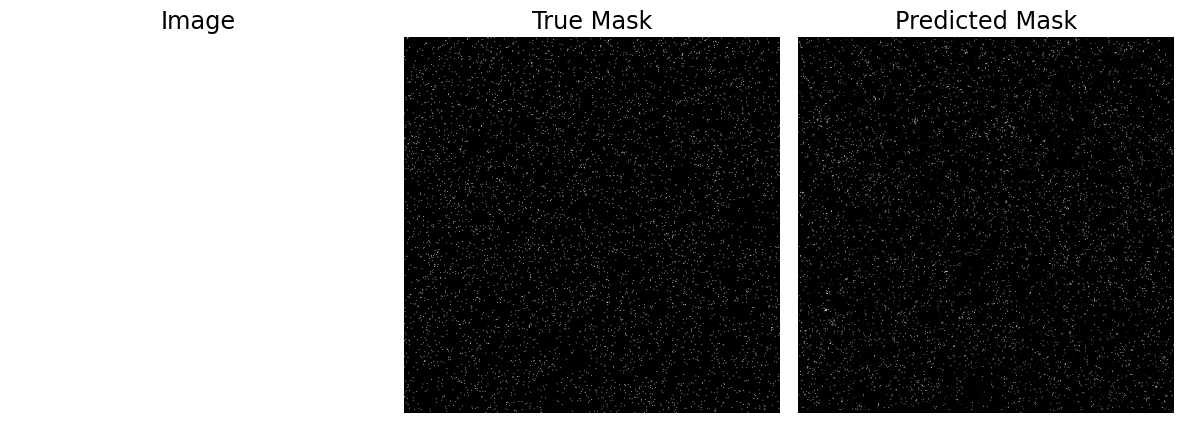

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1792.0..14256.0].


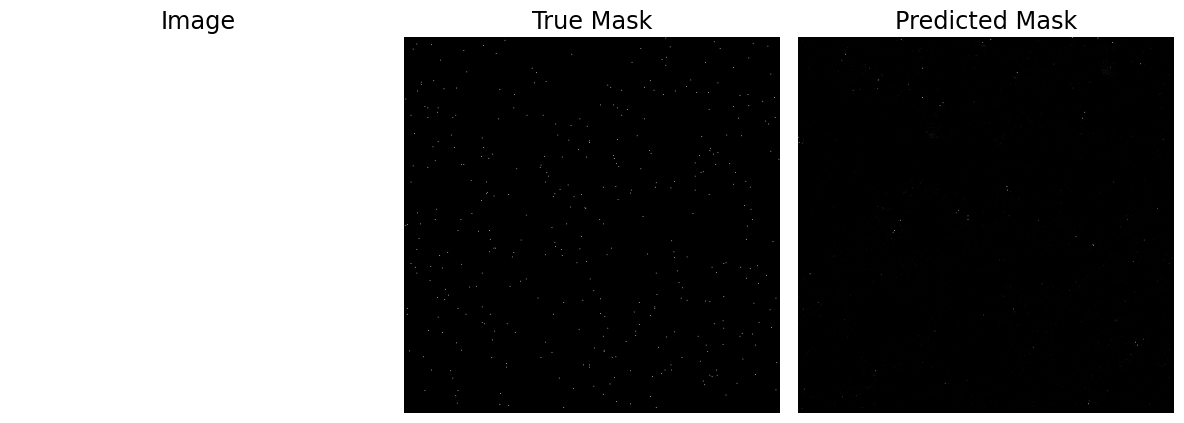

In [105]:
# Plot the results from the model
for i in range(4):
    image = test_images[i]
    mask = test_masks[i]
    pred_mask = model.predict(np.expand_dims(image, axis=0))[0]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Image')

    plt.subplot(1, 3, 2)
    plt.imshow(mask[:, :, 0], cmap='gray')
    plt.axis('off')
    plt.title('True Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask[:, :, 0], cmap='gray')
    plt.axis('off')
    plt.title('Predicted Mask')

    plt.tight_layout()
    plt.show()

In [106]:
# Make predictions on new data
predictions = model.predict(test_generator)

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


2024-10-23 20:15:50.126009: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 157286400 exceeds 10% of free system memory.


In [107]:
#Create a function to plot the image, mask and prediction side by side
def plot_image_mask_prediction_subplot(selection = 0):
    """
    Plots the image, mask, and prediction for a given selection index.
    Parameters:
    selection (int): The index of the image, mask, and prediction to plot. Default is 0.
    The function extracts the image, mask, and prediction arrays using the provided selection index.
    It then creates a figure with three subplots, each displaying the image, mask, and prediction respectively.
    The subplots are displayed with WCS (World Coordinate System) projection and labeled with RA (Right Ascension) and Dec (Declination).
    """
    image = extractImageArray('data/' + fits_files[selection])
    mask = test_masks[selection].squeeze()
    prediction = predictions[selection].squeeze()
    wcs = wcs_data[selection]

    fig, ax = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': wcs})
    ax[0].imshow(image, cmap='gray', origin='lower')
    ax[0].set_title('Image')
    ax[0].coords.grid(True, color='white', ls='solid')
    ax[0].coords[0].set_axislabel('RA')
    ax[0].coords[1].set_axislabel('Dec')

    ax[1].imshow(mask, cmap='gray', origin='lower')
    ax[1].set_title('Mask')
    ax[1].coords.grid(True, color='white', ls='solid')
    ax[1].coords[0].set_axislabel('RA')
    ax[1].coords[1].set_axislabel('Dec')

    ax[2].imshow(prediction, cmap='gray', origin='lower')
    ax[2].set_title('Prediction')
    ax[2].coords.grid(True, color='white', ls='solid')
    ax[2].coords[0].set_axislabel('RA')
    ax[2].coords[1].set_axislabel('Dec')

    plt.show()

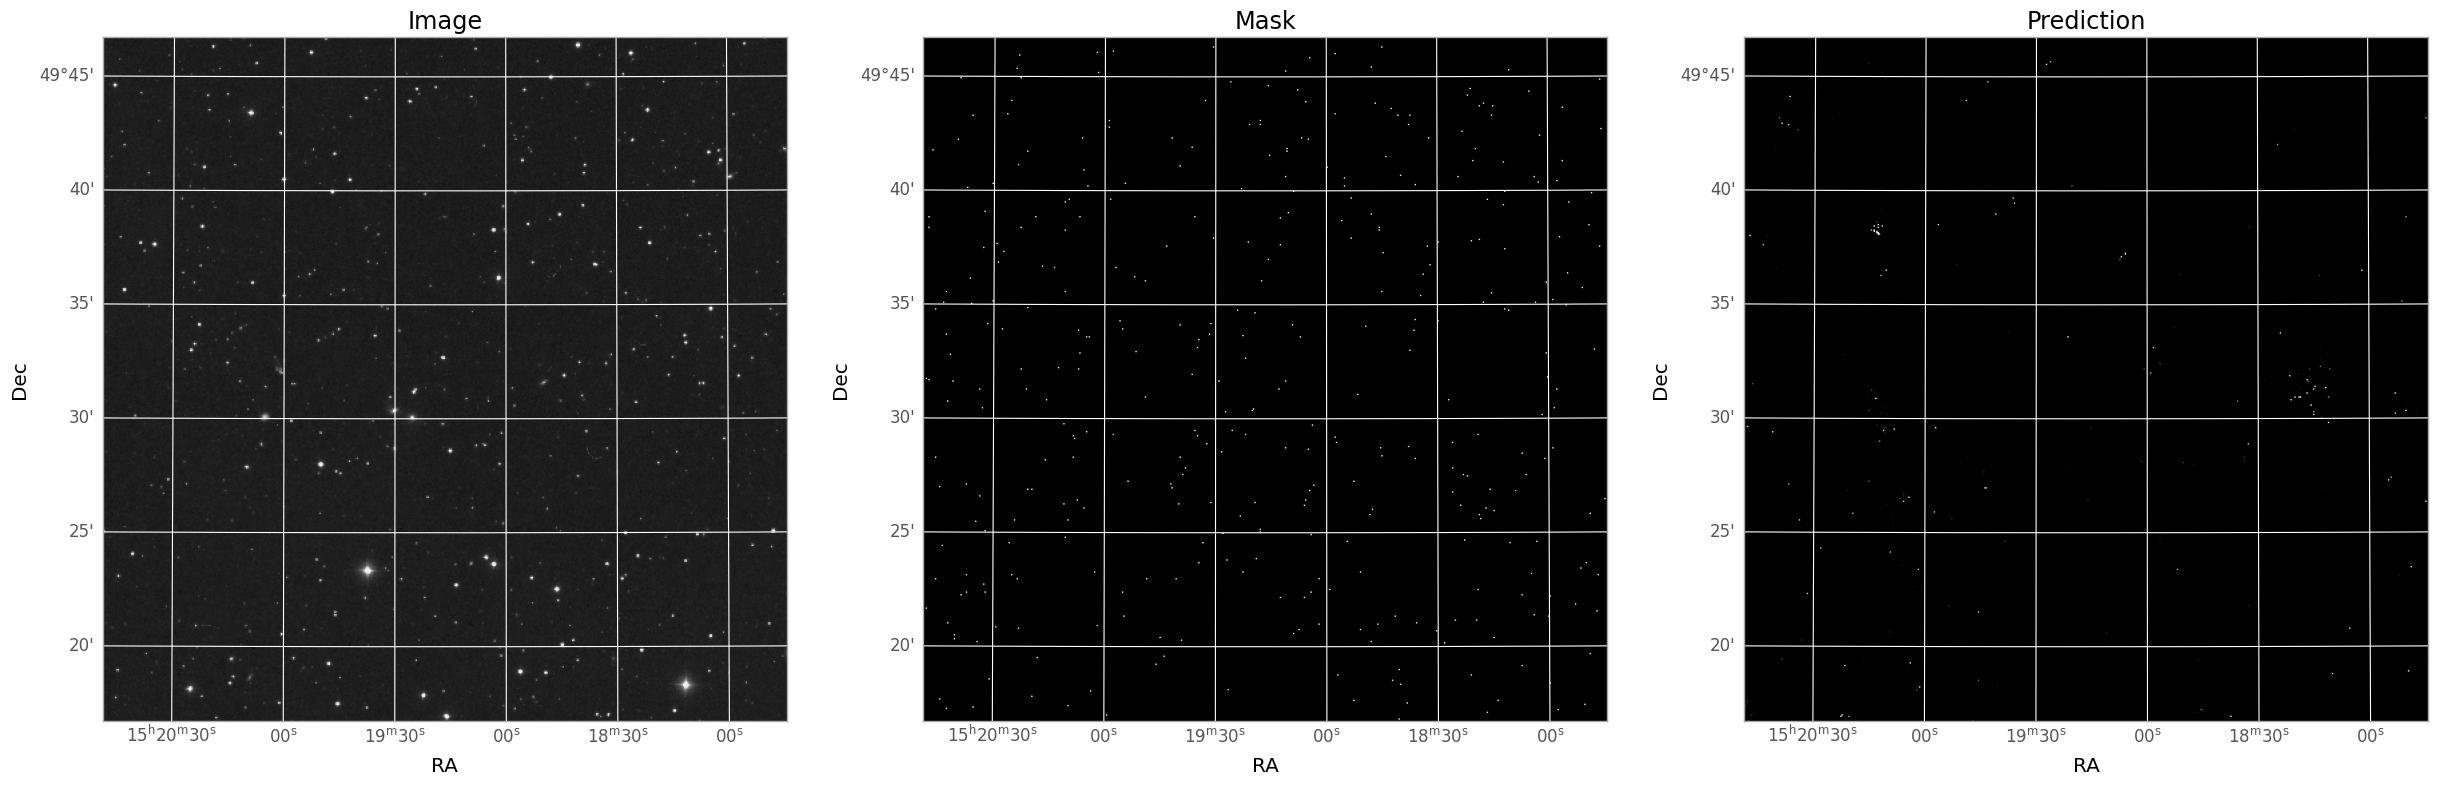

In [108]:
#Plot the 3rd image, mask and prediction
plot_image_mask_prediction_subplot(3)

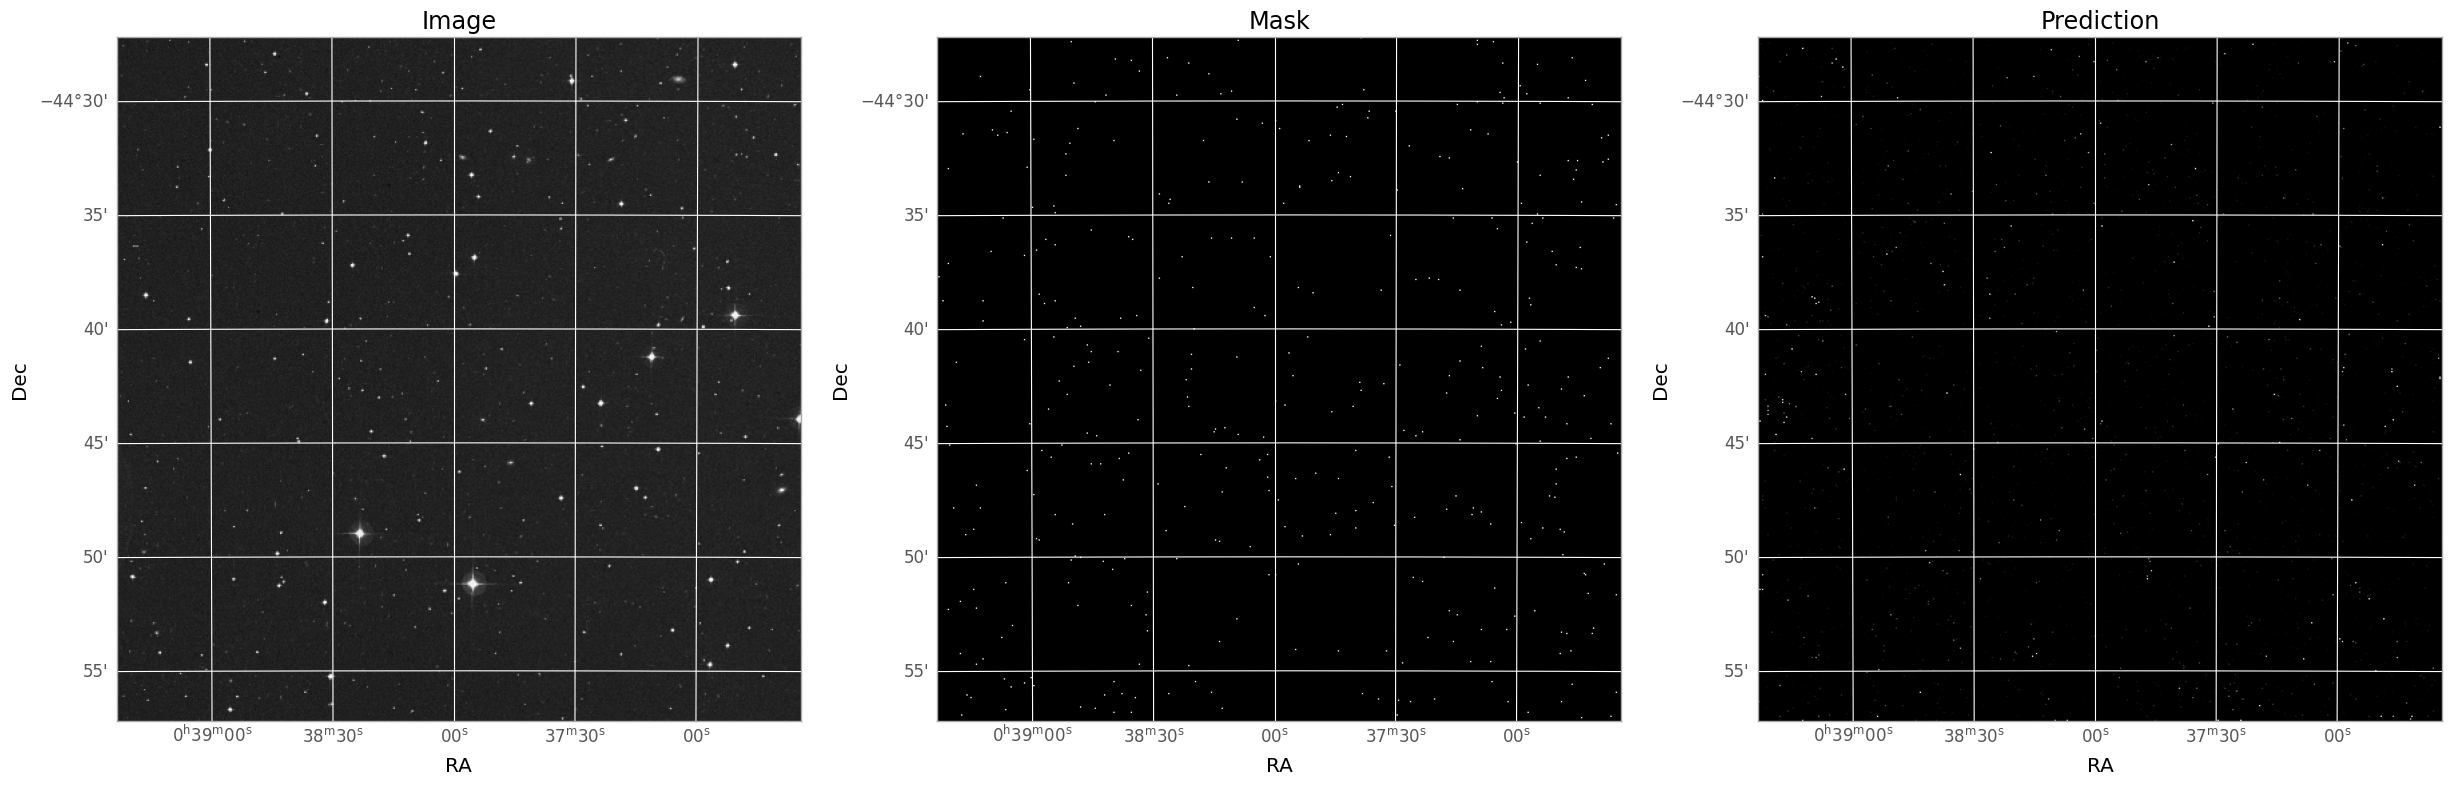

In [109]:
# Plot a random image mask prediction from the test set
selection = np.random.randint(0, len(test_images))
plot_image_mask_prediction_subplot(selection)


In [110]:
# Create a function to save the image, mask, and prediction to a file
def save_image_mask_prediction_subplot(selection = 0):
    """
    Saves the image, mask, and prediction for a given selection index to a file.
    Parameters:
    selection (int): The index of the image, mask, and prediction to save. Default is 0.
    file_path (str): The path to save the image, mask, and prediction to. Default is 'data["selection"].png'.
    The function extracts the image, mask, and prediction arrays using the provided selection index.
    It then creates a figure with three subplots, each displaying the image, mask, and prediction respectively.
    The subplots are saved to the specified file path.
    """
    image = extractImageArray('data/' + fits_files[selection]).squeeze()
    mask = test_masks[selection].squeeze()
    prediction = predictions[selection].squeeze()
    wcs = wcs_data[selection]

    fig, ax = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': wcs})
    ax[0].imshow(image, cmap='gray', origin='lower')
    ax[0].set_title('Image')
    ax[0].coords.grid(True, color='white', ls='solid')
    ax[0].coords[0].set_axislabel('RA')
    ax[0].coords[1].set_axislabel('Dec')

    ax[1].imshow(mask, cmap='gray', origin='lower')
    ax[1].set_title('Mask')
    ax[1].coords.grid(True, color='white', ls='solid')
    ax[1].coords[0].set_axislabel('RA')
    ax[1].coords[1].set_axislabel('Dec')

    ax[2].imshow(prediction, cmap='gray', origin='lower')
    ax[2].set_title('Prediction')
    ax[2].coords.grid(True, color='white', ls='solid')
    ax[2].coords[0].set_axislabel('RA')
    ax[2].coords[1].set_axislabel('Dec')

    file_path = 'images/prediction_subplot/' + fits_files[selection].replace('.fits', '.png')

    print(f'Saving image, mask, and prediction to {file_path}')

    plt.savefig(file_path)

Saving image, mask, and prediction to images/prediction_subplot/data102.png


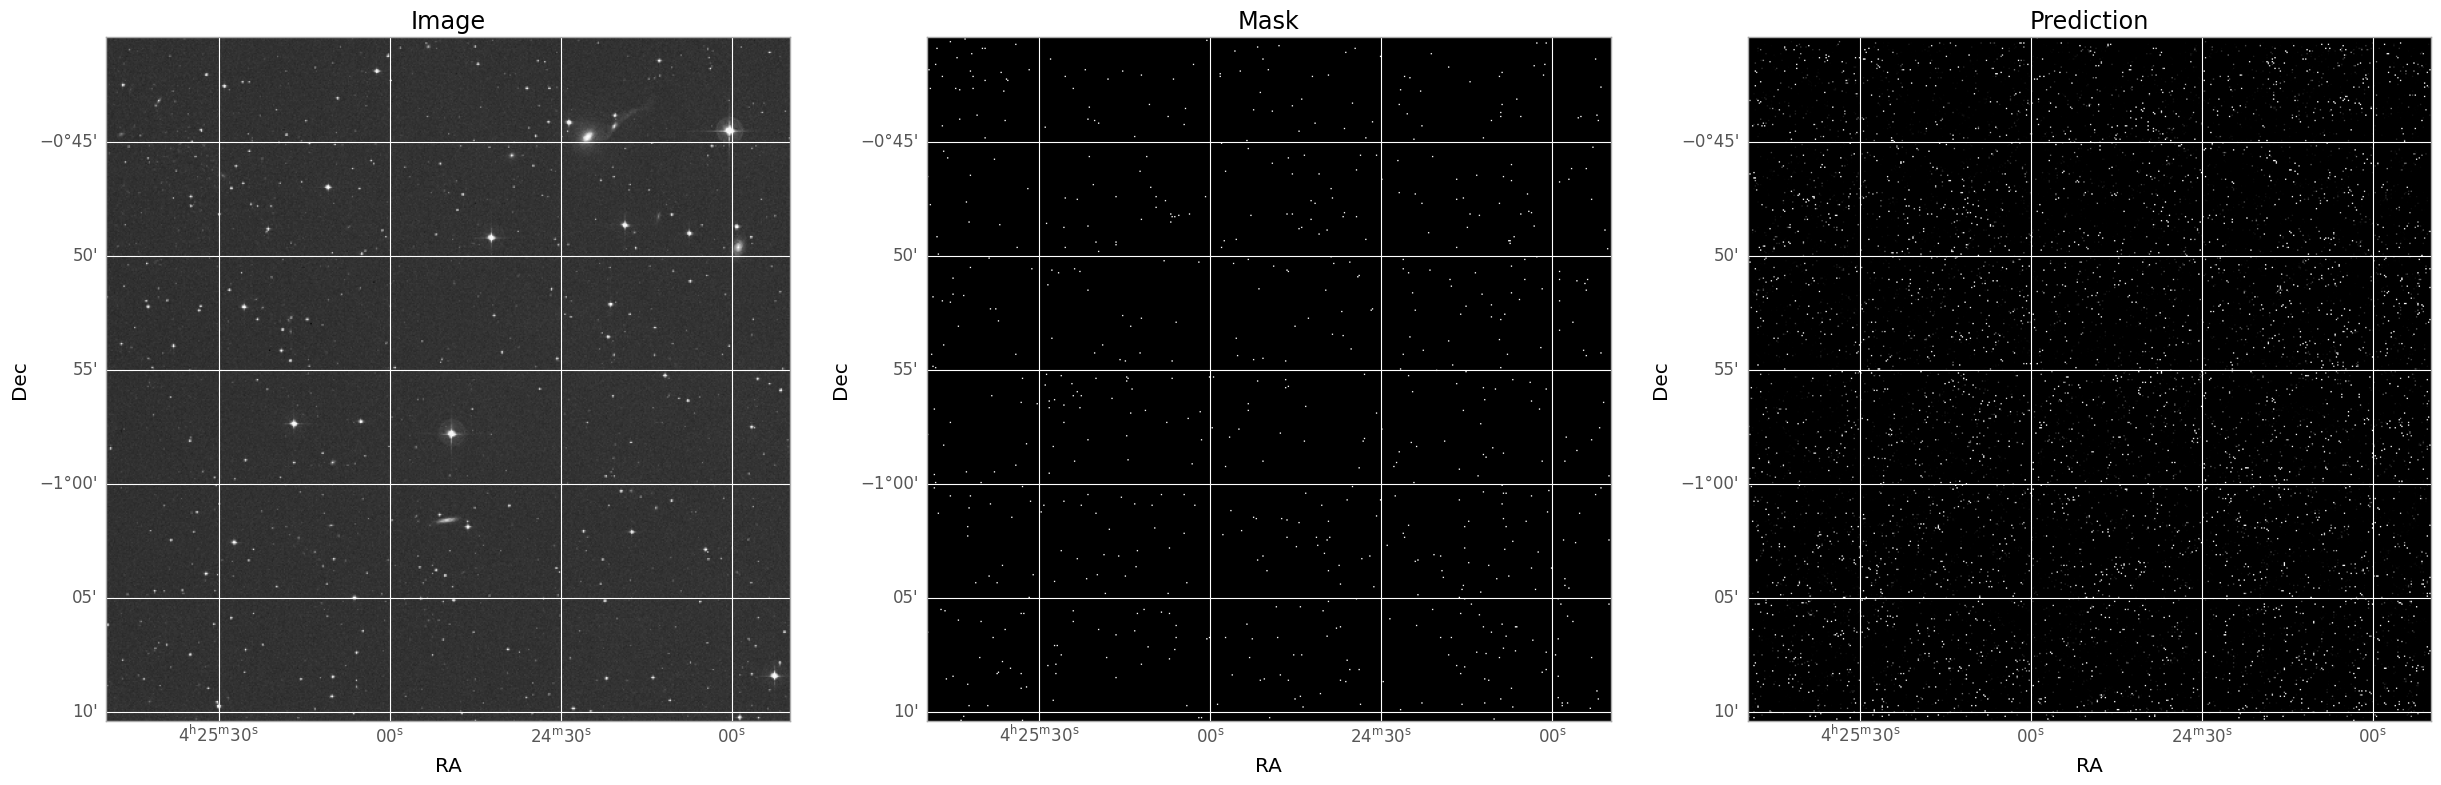

In [111]:
# Plot a random image mask prediction from the test set
choice = np.random.randint(0, len(test_images))
save_image_mask_prediction_subplot(selection = choice)

In [143]:
# I want to observe the prediction array to analyze the data and see what the model is predicting
# They are respresented as an array of values between 0 and 1 for likelihood of a star being present
# I will need to build a function to extract the star data from the prediction array
# I will need to set a threshold for the likelihood of a star being present
# I will need to extract the star data from the prediction array

def extract_star_predictions(prediction, threshold=0.5):
    """
    Extract the star data from the prediction array based on a threshold value and create a prediction mask.

    Parameters:
    ----------
    prediction : np.ndarray
        The prediction array to extract the star data from.
    threshold : float, optional
        The threshold value to determine if a pixel is a star (default is 0.5).

    Returns:
    -------
    star_data : list
        A list of tuples containing the (x, y) coordinates of the stars.
    prediction_mask : np.ndarray
        An array of 1's and 0's indicating the star locations.
    """
    # Threshold the prediction array to get the star locations
    stars = np.argwhere(prediction > threshold)

    # Create a list to store the star data
    star_data = []

    # Create a prediction mask of the same shape as the prediction array
    prediction_mask = np.zeros_like(prediction, dtype=int)

    # Iterate over the star locations and add them to the star data list and prediction mask
    for star in stars:
        y, x = star
        star_data.append((x, y))
        prediction_mask[y, x] = 1

    return star_data, prediction_mask

In [144]:
star_data, prediction_mask = extract_star_predictions(predictions[3].squeeze())

In [145]:
star_data

[(72, 3),
 (78, 3),
 (364, 3),
 (73, 4),
 (0, 11),
 (131, 25),
 (440, 35),
 (497, 37),
 (75, 41),
 (124, 43),
 (453, 69),
 (175, 81),
 (47, 95),
 (130, 113),
 (324, 113),
 (499, 115),
 (109, 126),
 (57, 129),
 (41, 150),
 (81, 155),
 (142, 156),
 (119, 164),
 (510, 164),
 (123, 167),
 (180, 174),
 (181, 174),
 (33, 177),
 (482, 180),
 (484, 182),
 (377, 207),
 (101, 209),
 (21, 216),
 (104, 217),
 (112, 218),
 (143, 219),
 (2, 220),
 (437, 223),
 (432, 226),
 (426, 229),
 (487, 230),
 (426, 231),
 (495, 232),
 (424, 236),
 (369, 239),
 (409, 240),
 (98, 241),
 (412, 242),
 (415, 242),
 (416, 242),
 (437, 242),
 (421, 245),
 (487, 245),
 (426, 248),
 (435, 249),
 (427, 250),
 (421, 255),
 (408, 258),
 (304, 260),
 (306, 279),
 (242, 287),
 (401, 290),
 (492, 314),
 (102, 333),
 (106, 337),
 (462, 337),
 (282, 347),
 (285, 349),
 (14, 356),
 (4, 363),
 (100, 364),
 (101, 364),
 (99, 365),
 (100, 365),
 (97, 366),
 (99, 366),
 (95, 367),
 (97, 367),
 (100, 369),
 (97, 370),
 (103, 370),
 

In [146]:
prediction_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [150]:
pixel_mask = extractPixelMaskArray('data/' + fits_files[selection])
pixel_mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

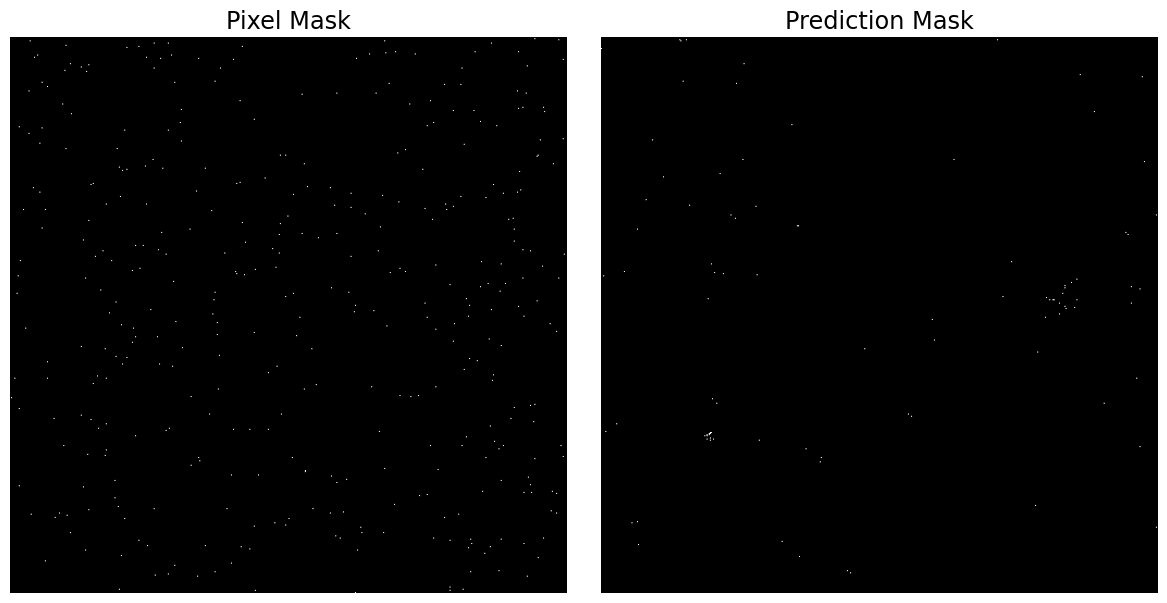

In [151]:
# Compare the prediction mask with the pixel mask
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(pixel_mask.squeeze(), cmap='gray')
plt.axis('off')
plt.title('Pixel Mask')

plt.subplot(1, 2, 2)
plt.imshow(prediction_mask, cmap='gray')
plt.axis('off')
plt.title('Prediction Mask')

plt.tight_layout()
plt.show()

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerPatch

def plot_prediction_overlay(selection=0):
    """
    Plot the image with overlayed blue circles where the mask has 1's and red circles where the prediction is predicting the star locations.

    Parameters:
    ----------
    selection : int, optional
        The index of the image to plot (default is 0).
    """

    # Extract the image, mask, and prediction for the selected index
    image = extractImageArray('data/' + fits_files[selection])
    # mask = test_masks[selection].squeeze()
    mask = extractPixelMaskArray('data/' + fits_files[selection])
    # prediction = predictions[selection].squeeze()
    star_predictions, prediction_mask = extract_star_predictions(predictions[selection].squeeze())
    wcs = wcs_data[selection]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection=wcs)

    # Plot the image
    ax.imshow(image, cmap='gray', origin='lower')

    # Overlay blue circles where the mask has 1's
    mask_coords = np.argwhere(mask == 1)
    for coord in mask_coords:
        y, x = coord
        circle = Circle((x, y), 2, fill=False, edgecolor='blue', linewidth=1)
        ax.add_artist(circle)

    # Overlay red circles where the prediction has 1's
    prediction_coords = np.argwhere(prediction_mask == 1)
    for coord in prediction_coords:
        y, x = coord
        circle = Circle((x, y), 2, fill=False, edgecolor='red', linewidth=1)
        ax.add_artist(circle)

    ax.set_title('Image with Mask and Prediction Overlays')
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')
    ax.grid(color='white', ls='dotted')

    # Add legend
    def make_legend_circle(legend, orig_handle, xdescent, ydescent, width, height, fontsize):
        return Circle((width / 2, height / 2), 0.25 * height, fill=False, edgecolor=orig_handle.get_edgecolor(), linewidth=orig_handle.get_linewidth())


    # Display a legend for the circles
    blue_circle = Circle((0, 0), 1, fill=False, edgecolor='blue', linewidth=1)
    red_circle = Circle((0, 0), 1, fill=False, edgecolor='red', linewidth=1)
    ax.legend([blue_circle, red_circle], ['Pixel Mask', 'Star Prediction'], loc='upper right', handler_map={Circle: HandlerPatch(patch_func=make_legend_circle)})


    plt.show()

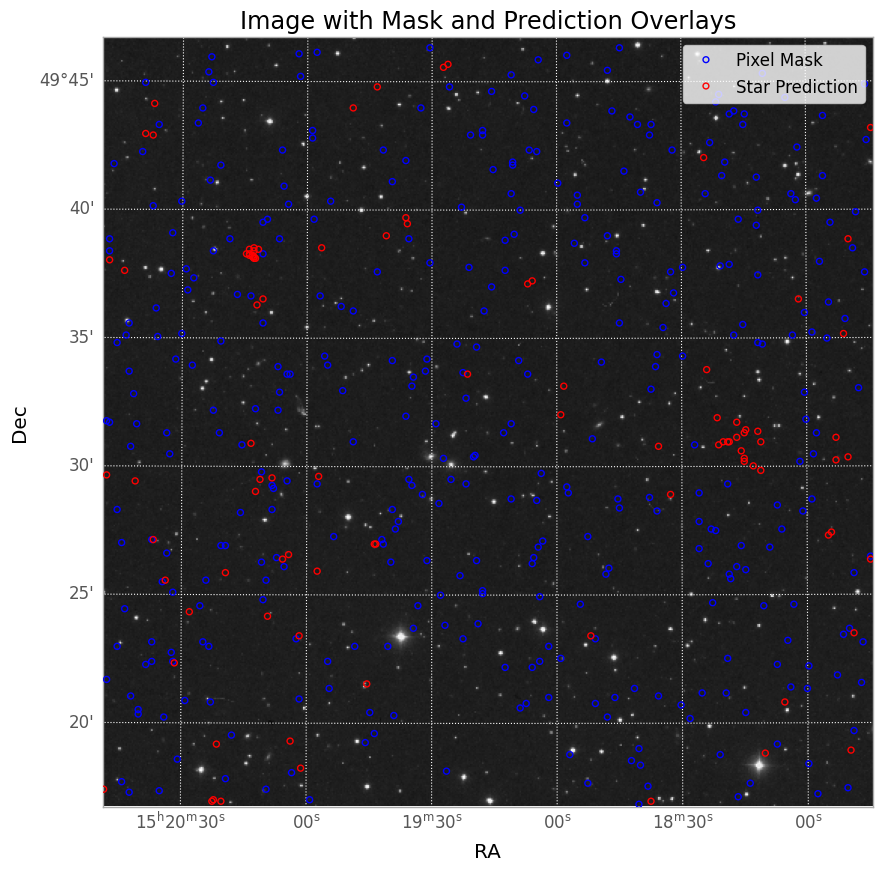

In [148]:
# Plot the image with overlayed mask and prediction
plot_prediction_overlay(3)

In [118]:
# Create a function to save the image with overlayed mask and prediction to a file
def save_image_mask_prediction_overlay(selection=0):
    """
    Save the image with overlayed blue circles where the mask has 1's and red circles where the prediction is predicting the star locations to a file.

    Parameters:
    ----------
    selection : int, optional
        The index of the image to save (default is 0).
    file_path : str, optional
        The path to save the image to (default is 'data["selection"].png').
    """

    # Extract the image, mask, and prediction for the selected index
    image = extractImageArray('data/' + fits_files[selection])
    mask = test_masks[selection].squeeze()
    # prediction = predictions[selection].squeeze()
    star_predictions, prediction_mask = extract_star_predictions(predictions[selection].squeeze())
    wcs = wcs_data[selection]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection=wcs)

    # Plot the image
    ax.imshow(image, cmap='gray', origin='lower')

    # Overlay blue circles where the mask has 1's
    mask_coords = np.argwhere(mask == 1)
    for coord in mask_coords:
        y, x = coord
        circle = Circle((x, y), 2, fill=False, edgecolor='blue', linewidth=1)
        ax.add_artist(circle)

    # Overlay red circles where the prediction has 1's
    prediction_coords = np.argwhere(prediction_mask == 1)
    for coord in prediction_coords:
        y, x = coord
        circle = Circle((x, y), 2, fill=False, edgecolor='red', linewidth=1)
        ax.add_artist(circle)

    ax.set_title('Image with Mask and Prediction Overlays')
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')
    ax.grid(color='white', ls='dotted')

    # Add legend
    def make_legend_circle(legend, orig_handle, xdescent, ydescent, width, height, fontsize):
        return Circle((width / 2, height / 2), 0.25 * height, fill=False, edgecolor=orig_handle.get_edgecolor(), linewidth=orig_handle.get_linewidth())


    # Display a legend for the circles
    blue_circle = Circle((0, 0), 1, fill=False, edgecolor='blue', linewidth=1)
    red_circle = Circle((0, 0), 1, fill=False, edgecolor='red', linewidth=1)
    ax.legend([blue_circle, red_circle], ['Pixel Mask', 'Star Prediction'], loc='upper right', handler_map={Circle: HandlerPatch(patch_func=make_legend_circle)})
    
    file_path = 'images/prediction_overlay/' + fits_files[selection].replace('.fits', '.png')

    print(f'Saving image with mask and prediction overlays to {file_path}')

    plt.savefig(file_path)

Saving image with mask and prediction overlays to images/prediction_overlay/data51.png


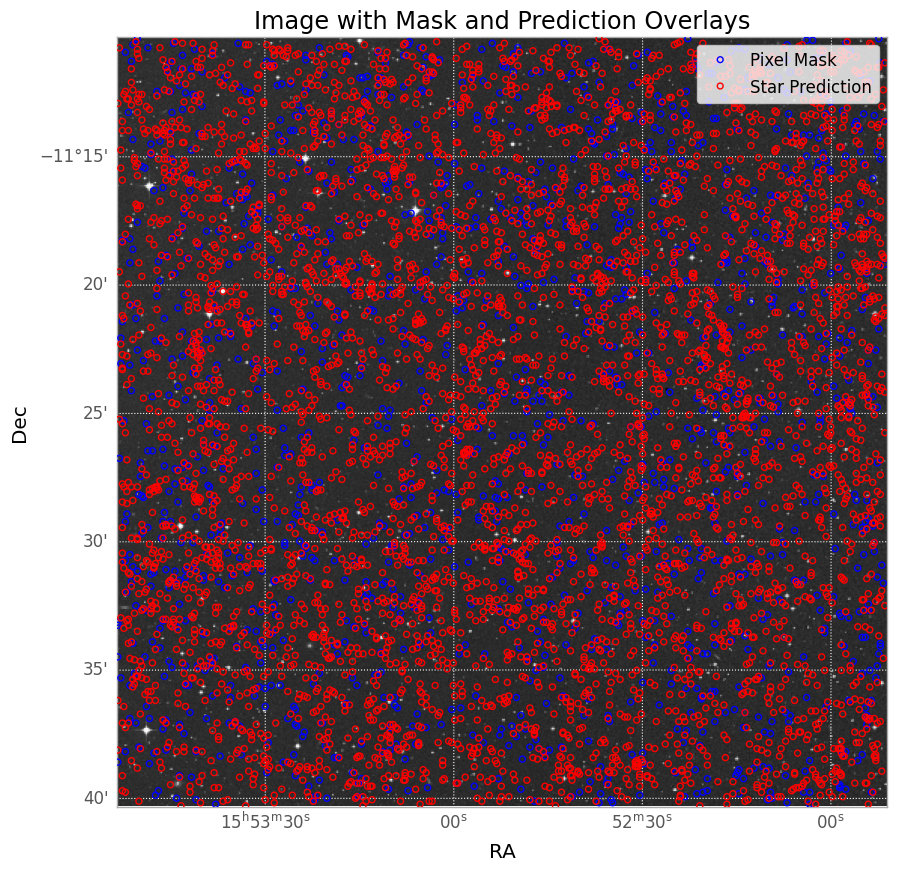

In [119]:
# Save a random image mask prediction from the test set
choice = np.random.randint(0, len(test_images))
save_image_mask_prediction_overlay(selection=choice)

In [120]:
# # Iterate over the test set and save the image with overlayed mask and prediction to a file
# for i in range(len(test_images)):
#     save_image_mask_prediction_subplot(selection=i)
#     save_image_mask_prediction_overlay(selection=i)
